In [1]:
picture_size = 48
folder_path = "D:\\Projects\\Sentimental Analysis\\Dataset"

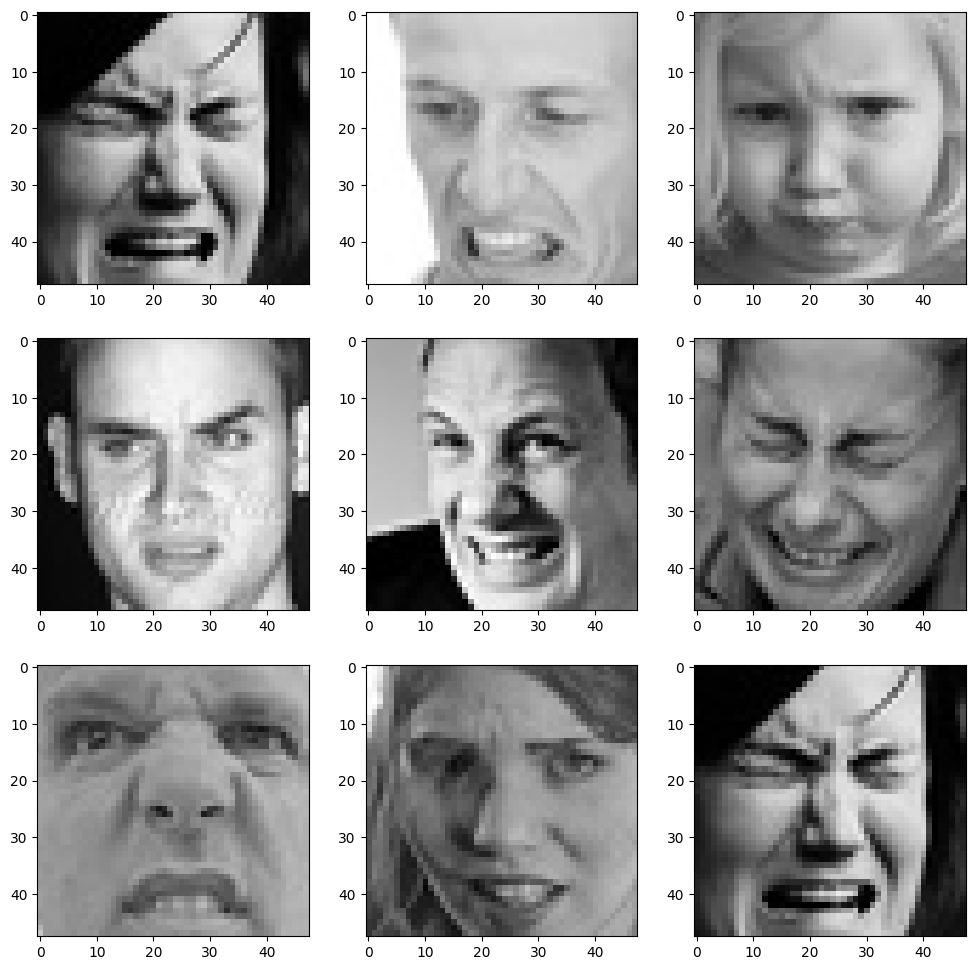

In [8]:
from tensorflow.keras.preprocessing.image import load_img
expression = 'disgust'
import matplotlib.pyplot as plt
import os
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img_path = os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i])
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.imshow(img)

plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size  = 128


train_dir = os.path.join(folder_path, "train")
test_dir = os.path.join(folder_path, "validation")

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(train_dir,
                                              target_size=(picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size=batch_size,
                                              class_mode="categorical",
                                              shuffle=True)

test_set = datagen_val.flow_from_directory(test_dir,
                                           target_size=(picture_size, picture_size),
                                           color_mode="grayscale",
                                           batch_size=batch_size,
                                           class_mode="categorical",
                                           shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [17]:
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [19]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [21]:
history = model.fit(train_set,
                    steps_per_epoch=train_set.n // train_set.batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=test_set.n // test_set.batch_size,
                    callbacks=callbacks_list)

Epoch 1/48


C:\Users\smano\PyCharmMiscProject\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.2588 - loss: 1.9416

C:\Users\smano\PyCharmMiscProject\.venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:277: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


225/225 ━━━━━━━━━━━━━━━━━━━━ 141s 610ms/step - accuracy: 0.2591 - loss: 1.9409 - val_accuracy: 0.3202 - val_loss: 1.7975 - learning_rate: 0.0010
Epoch 2/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 2:07 570ms/step - accuracy: 0.4297 - loss: 1.4784

C:\Users\smano\PyCharmMiscProject\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.4297 - loss: 1.4784 - val_accuracy: 0.3247 - val_loss: 1.7670 - learning_rate: 0.0010
Epoch 3/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.4300 - loss: 1.4718

225/225 ━━━━━━━━━━━━━━━━━━━━ 135s 599ms/step - accuracy: 0.4301 - loss: 1.4716 - val_accuracy: 0.4820 - val_loss: 1.3465 - learning_rate: 0.0010
Epoch 4/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 2:18 617ms/step - accuracy: 0.4766 - loss: 1.4342

225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.4766 - loss: 1.4342 - val_accuracy: 0.4881 - val_loss: 1.3407 - learning_rate: 0.0010
Epoch 5/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.5029 - loss: 1.2863

225/225 ━━━━━━━━━━━━━━━━━━━━ 134s 594ms/step - accuracy: 0.5029 - loss: 1.2863 - val_accuracy: 0.5290 - val_loss: 1.2384 - learning_rate: 0.0010
Epoch 6/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 2:09 580ms/step - accuracy: 0.5938 - loss: 1.2559

225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.5938 - loss: 1.2559 - val_accuracy: 0.5305 - val_loss: 1.2290 - learning_rate: 0.0010
Epoch 7/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.5423 - loss: 1.1973

225/225 ━━━━━━━━━━━━━━━━━━━━ 131s 580ms/step - accuracy: 0.5423 - loss: 1.1973 - val_accuracy: 0.5376 - val_loss: 1.2037 - learning_rate: 0.0010
Epoch 8/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 1:58 528ms/step - accuracy: 0.5938 - loss: 1.1511

225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5938 - loss: 1.1511 - val_accuracy: 0.5459 - val_loss: 1.1802 - learning_rate: 0.0010
Epoch 9/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.5721 - loss: 1.1273

225/225 ━━━━━━━━━━━━━━━━━━━━ 129s 574ms/step - accuracy: 0.5721 - loss: 1.1273 - val_accuracy: 0.5768 - val_loss: 1.1385 - learning_rate: 0.0010
Epoch 10/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 2:09 580ms/step - accuracy: 0.5938 - loss: 1.0364

225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.5938 - loss: 1.0364 - val_accuracy: 0.5734 - val_loss: 1.1364 - learning_rate: 0.0010
Epoch 11/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.5951 - loss: 1.0706

225/225 ━━━━━━━━━━━━━━━━━━━━ 130s 579ms/step - accuracy: 0.5951 - loss: 1.0707 - val_accuracy: 0.5872 - val_loss: 1.0896 - learning_rate: 0.0010
Epoch 12/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 2:22 638ms/step - accuracy: 0.5781 - loss: 1.0265

225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.5781 - loss: 1.0265 - val_accuracy: 0.5801 - val_loss: 1.1004 - learning_rate: 0.0010
Epoch 13/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.6093 - loss: 1.0381

225/225 ━━━━━━━━━━━━━━━━━━━━ 132s 585ms/step - accuracy: 0.6093 - loss: 1.0381 - val_accuracy: 0.5467 - val_loss: 1.2110 - learning_rate: 0.0010
Epoch 14/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 2:17 613ms/step - accuracy: 0.6484 - loss: 1.0108


Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6484 - loss: 1.0108 - val_accuracy: 0.5178 - val_loss: 1.2742 - learning_rate: 0.0010
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 11.


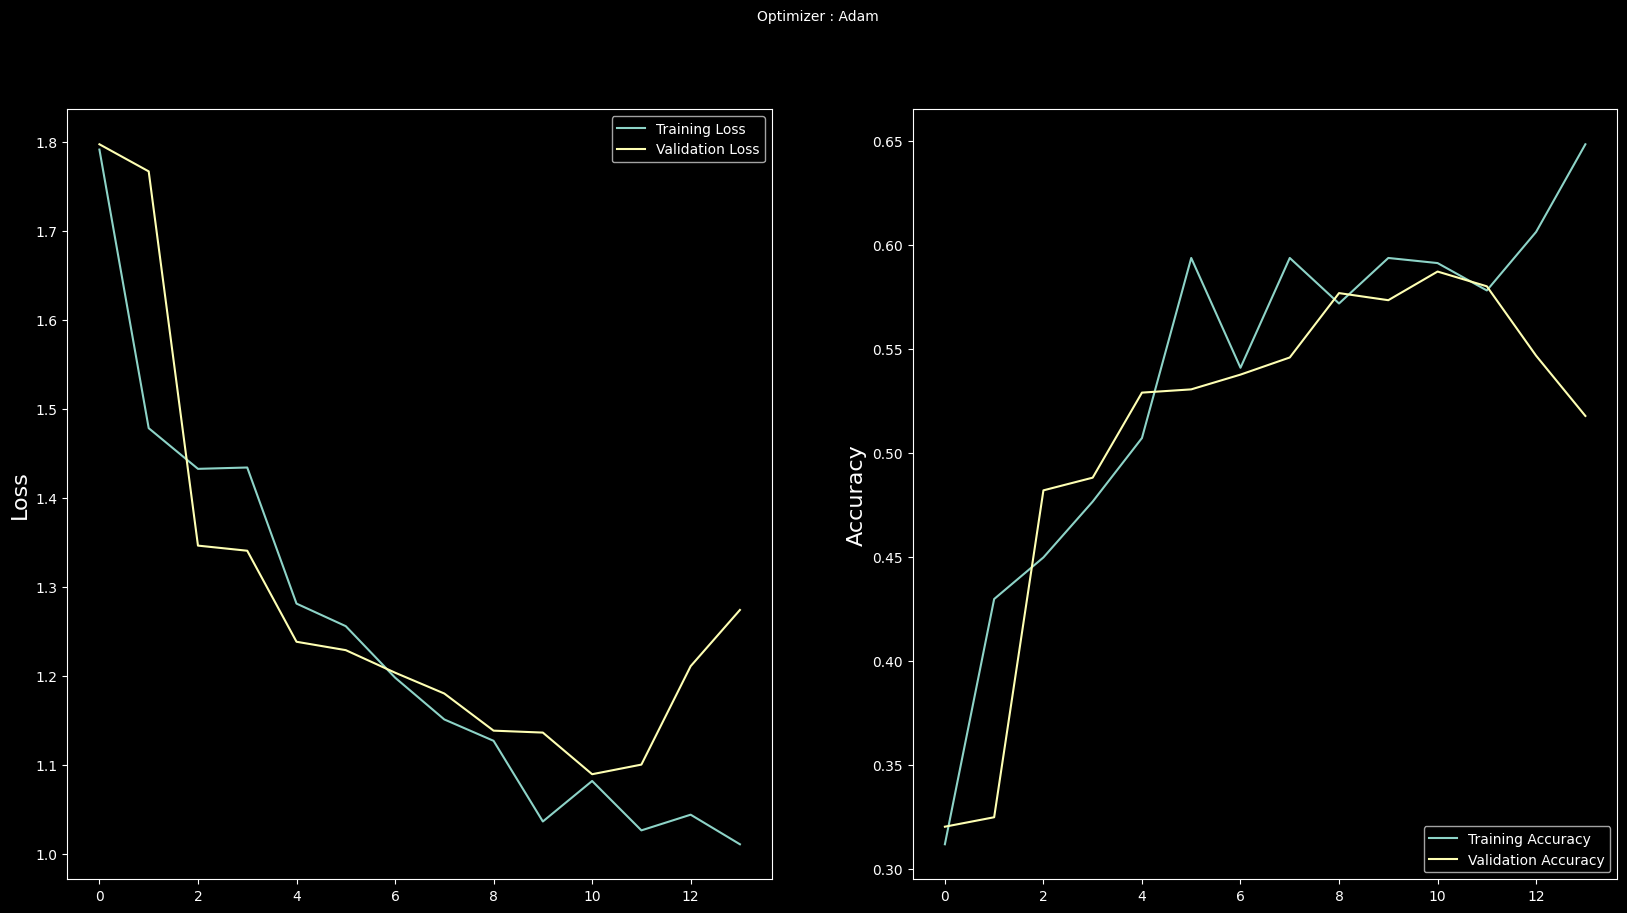

In [22]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [23]:
model.save(r"D:\Projects\Sentimental Analysis\model.h5")